In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.3 MB/s eta 0

In [2]:
import pandas as pd
data =pd.read_csv("/content/MaunaLoaDailyTemps.csv")
data.head()
data.describe

<bound method NDFrame.describe of             DATE  MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
0       1/1/2014     33.0     46.0     40.0      657    1756
1       1/2/2014     35.0     50.0     43.0      657    1756
2       1/3/2014     36.0     45.0     41.0      657    1757
3       1/4/2014     32.0     41.0     37.0      658    1757
4       1/5/2014     24.0     38.0     31.0      658    1758
...          ...      ...      ...      ...      ...     ...
1820  12/26/2018     35.0     45.0     40.0      654    1752
1821  12/27/2018     33.0     44.0     39.0      655    1752
1822  12/28/2018     33.0     47.0     40.0      655    1753
1823  12/29/2018     36.0     47.0     42.0      655    1753
1824  12/30/2018     39.0     52.0     46.0      656    1754

[1825 rows x 6 columns]>

In [7]:
data=data.dropna()

In [8]:
from pycaret.regression import setup

regression_setup = setup(data, target='AvgTemp', session_id=123)


,Description,Value
0,Session id,123
1,Target,AvgTemp
2,Target type,Regression
3,Original data shape,"(1821, 6)"
4,Transformed data shape,"(1821, 6)"
5,Transformed train set shape,"(1274, 6)"
6,Transformed test set shape,"(547, 6)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


In [9]:
from pycaret.regression import compare_models

best_models = compare_models(n_select=3)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.2504,0.0633,0.2516,0.9962,0.0053,0.0054,0.0880
en,Elastic Net,0.2740,0.1061,0.3254,0.9936,0.0070,0.0059,0.1040
lasso,Lasso Regression,0.3104,0.1439,0.3788,0.9914,0.0082,0.0067,0.0600
llar,Lasso Least Angle Regression,0.3104,0.1439,0.3789,0.9914,0.0082,0.0067,0.1130
knn,K Neighbors Regressor,0.6571,0.8574,0.9168,0.9496,0.0202,0.0144,0.0660
par,Passive Aggressive Regressor,1.0356,2.8773,1.3049,0.8370,0.0289,0.0234,0.0680
ridge,Ridge Regression,1.7863,5.2109,2.2771,0.6933,0.0499,0.0394,0.0600
et,Extra Trees Regressor,2.6970,11.2006,3.3387,0.3401,0.0723,0.0594,0.2050
omp,Orthogonal Matching Pursuit,3.0124,14.3392,3.7793,0.1519,0.0814,0.0662,0.1040
lightgbm,Light Gradient Boosting Machine,3.1985,16.9646,4.1084,0.0018,0.0886,0.0708,0.8250


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [10]:
from pycaret.regression import create_model

model = create_model('huber')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2532,0.0649,0.2548,0.9950,0.0053,0.0054
1,0.2473,0.0613,0.2477,0.9962,0.0052,0.0053
2,0.2528,0.0645,0.2539,0.9952,0.0053,0.0054
3,0.2498,0.0628,0.2507,0.9964,0.0054,0.0054
4,0.2468,0.0621,0.2493,0.9967,0.0053,0.0053
5,0.2496,0.0628,0.2506,0.9968,0.0054,0.0054
6,0.2506,0.0634,0.2517,0.9967,0.0053,0.0054
7,0.2515,0.0642,0.2534,0.9960,0.0054,0.0054
8,0.2527,0.0643,0.2535,0.9960,0.0055,0.0055


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

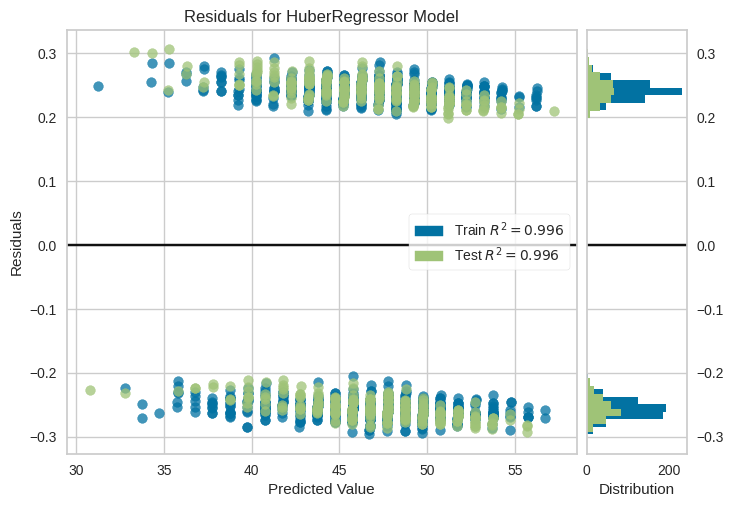

In [11]:
from pycaret.regression import plot_model

plot_model(model, plot='residuals')


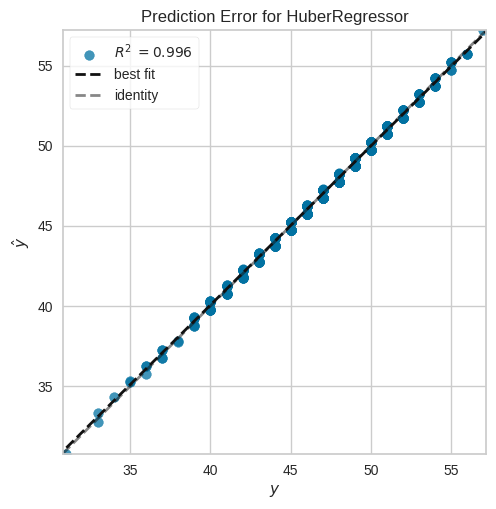

In [14]:
from pandas.core.arrays.datetimelike import mode
plot_model(model, plot='error')

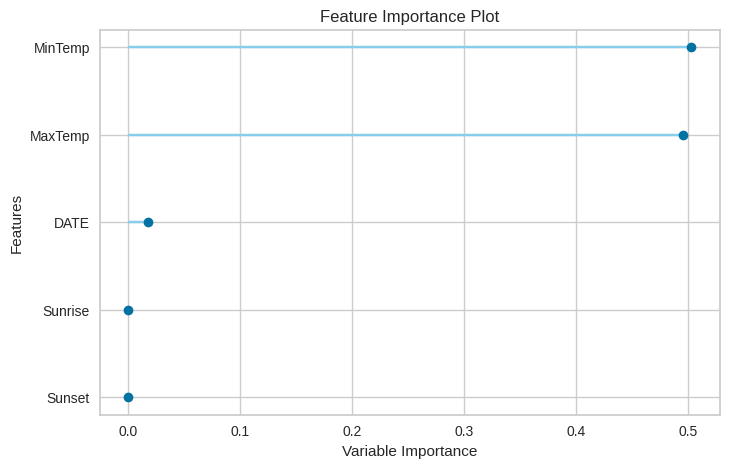

In [16]:
from pandas.core.arrays.datetimelike import mode
plot_model(model, plot='feature')

In [17]:
from pycaret.regression import save_model

save_model(model, 'huber')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['MinTemp', 'MaxTemp', 'Sunrise',
                                              'Sunset'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['DATE'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['DATE'],
                                     transformer=TargetEncoder(cols=['DATE'],
                                                               handle_missing='return_nan'))),
                 ('trained_model', HuberRegressor())]),
 'huber.pkl')